In [2]:
# imports
%matplotlib notebook
from pylab import *
import numpy as np
import scipy as sp
from scipy import signal as sg
from scipy import stats as stats
import matplotlib.pyplot as plt

# library that loads the blackrock data files
from brpylib             import NsxFile, NevFile
import sys
import os
import math
import spike_statistics as ss
import analyze_spikeDataPB as data

In [3]:
# Read data sessions

#Initialisation des listes

Mice= [122,129,120]

nSessions=[10,10,10]

DATA=[]
Frames=[]
Reward=[]
Licks=[]
TrialStart=[]
EnteringEvent=[]

sessions=[]
FreeWater=[]

for mouse in range (len(Mice)):
    DATA.append([])
    Frames.append([])
    Reward.append([])
    Licks.append([])
    TrialStart.append([])
    EnteringEvent.append([])
    FreeWater.append([])


    
# Mouse 122
sessions.append([0,1,2,3,4,5,6,7,8,9]) #0 based index

for session in sessions[0]:
    Frames[0].append([])
    Reward[0].append([])
    Licks[0].append([])
    TrialStart[0].append([])
    EnteringEvent[0].append([])      
    datafile = "/Volumes/HENRI DD/Data/mouse122/Playback/session"+str(session+1)+"/data.nev"
    nev_file = NevFile(datafile)
    DATA[0].append(nev_file.getdata(elec_ids='all', wave_read='noread'))
    FreeWater[0].append([])
    
# Mouse 129
sessions.append([8,9,10,11,12,13,14,15,16,17]) #0 based index

for session in sessions[1]:
    Frames[1].append([])
    Reward[1].append([])
    Licks[1].append([])
    TrialStart[1].append([])
    EnteringEvent[1].append([])      
    datafile = "/Volumes/HENRI DD/Data/mouse129/Playback/session"+str(session+1)+"/data.nev"
    nev_file = NevFile(datafile)
    DATA[1].append(nev_file.getdata(elec_ids='all', wave_read='noread'))
    
    FreeWater[1].append([])

# Mouse 120
sessions.append([6,7,8,9,10,12,13,14,17,18]) #0 based index

for session in sessions[2]:
    Frames[2].append([])
    Reward[2].append([])
    Licks[2].append([])
    TrialStart[2].append([])
    EnteringEvent[2].append([])      
    datafile = "/Volumes/HENRI DD/Data/mouse120/Playback/session"+str(session+1)+"/data.nev"
    nev_file = NevFile(datafile)
    DATA[2].append(nev_file.getdata(elec_ids='all', wave_read='noread'))
    FreeWater[2].append([])




data.nev opened

data.nev opened

data.nev opened

data.nev opened

data.nev opened

data.nev opened

data.nev opened

data.nev opened

data.nev opened

data.nev opened

data.nev opened

data.nev opened

data.nev opened

data.nev opened

data.nev opened

data.nev opened

data.nev opened

data.nev opened

data.nev opened

data.nev opened

data.nev opened

data.nev opened

data.nev opened

data.nev opened

data.nev opened

data.nev opened

data.nev opened

data.nev opened

data.nev opened

data.nev opened


In [4]:
RewardUp=[205,205,205]
RewardLow=[155,155,155]
for mouse in range(len(Mice)):
    for session in range(nSessions[mouse]):
        Frames[mouse][session], Reward[mouse][session], Licks[mouse][session], TrialStart[mouse][session], EnteringEvent[mouse][session], FreeWater[mouse][session]  = data.getAll_events(DATA[mouse][session])
        Licks[mouse][session]=Licks[mouse][session][::2]

In [4]:
#Remove crap from the lickport
for k in range(20):        
    for mouse in range(len(Mice)):
        for session in range(nSessions[mouse]):
            Licks[mouse][session]=list(Licks[mouse][session])
            Lick_index=0
            while(Lick_index < (len(Licks[mouse][session])-1)):
                if Licks[mouse][session][Lick_index+1]-Licks[mouse][session][Lick_index]<30000*0.05:
                    Licks[mouse][session].pop(Lick_index+1)
                Lick_index+=1

In [5]:
Not_thirsty_nb=[]
for mouse in range(len(Mice)):
    Not_thirsty_nb.append([])
    for session in range(nSessions[mouse]):
        Lickbool=[]
        Not_thirsty_nb[mouse].append(0)
        for trial_index in range(len(TrialStart[mouse][session])-1):
            Lickbool.append(0)#0 if did not lick during a trial, 1 if yes
            for lick_index in range(len(Licks[mouse][session])):
                if TrialStart[mouse][session][trial_index]<=Licks[mouse][session][lick_index]<=TrialStart[mouse][session][trial_index+1]-5*30000:
                    Lickbool[trial_index]=1
                    break
                    
        for k in range (10,len(Lickbool),1):
            if Lickbool[k]==0 and Lickbool[k-1]==0 and Lickbool[k-2]==0 and Lickbool[k-3]==0 and Lickbool[k-4]==0 and Lickbool[k-5]==0 and Lickbool[k-6]==0 and Lickbool[k-7]==0 and Lickbool[k-8]==0 and Lickbool[k-9] == 0:
                Not_thirsty_nb[mouse][session]=k-10
                break

print(Not_thirsty_nb)
#Remove everything if not thirsty.

for mouse in [2]:
    for session in range(nSessions[mouse]):
        if Not_thirsty_nb[mouse][session]!=0:
            end=TrialStart[mouse][session][Not_thirsty_nb[mouse][session]-1]
            for l_ind in range(len(Licks[mouse][session])):
                if Licks[mouse][session][l_ind]>=end:
                    Licks[mouse][session]=Reward[mouse][session][0:l_ind]
                    break
                    
            for r_ind in range(len(Reward[mouse][session])):
                if Reward[mouse][session][r_ind]>=end:
                    Reward[mouse][session]=Reward[mouse][session][0:r_ind]
                    break
                    
            for ent_ind in range(len(EnteringEvent[mouse][session])):
                if EnteringEvent[mouse][session][ent_ind]>end:
                    EnteringEvent[mouse][session]=EnteringEvent[mouse][session][0:ent_ind]
                    break
                    
            for trial_ind in range(len(TrialStart[mouse][session])):
                if TrialStart[mouse][session][trial_ind]>=end:

                    TrialStart[mouse][session]=TrialStart[mouse][session][0:trial_ind]
                    break
                    
            for frame_ind in range(len(Frames[mouse][session])):
                if Frames[mouse][session][:][:,1][frame_ind]>=end+6*30000:

                    Frames[mouse][session]=Frames[mouse][session][0:frame_ind]
                    break
                            
            for Free in FreeWater[mouse][session]:               
                if Free>end:
                    FreeWater[mouse][session].remove(Free)
                    

[[54, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 45, 0, 12, 0, 0, 0, 13, 0]]


In [6]:
#Remove Bursts of Licks/ Bursts of rewards
First_Licks=[]
First_Rewards=[]
for mouse in range(len(Mice)):
    First_Licks.append([])
    First_Rewards.append([])
    for session in range(nSessions[mouse]):
        if len(Licks[mouse][session])>0:
            First_Licks[mouse].append([Licks[mouse][session][0]])
        else:
            First_Licks[mouse].append([])
        if len(Reward[mouse][session])>0:
            First_Rewards[mouse].append([Reward[mouse][session][0]])
        else:
            First_Rewards[mouse].append([])  
        for Lick_index in range (len(Licks[mouse][session])-1):
            if Licks[mouse][session][Lick_index+1]-Licks[mouse][session][Lick_index]>3000*30:
                First_Licks[mouse][session].append(Licks[mouse][session][Lick_index+1])
        for Reward_index in range (len(Reward[mouse][session])-1):
            if Reward[mouse][session][Reward_index+1]-Reward[mouse][session][Reward_index]>3000*30:
                First_Rewards[mouse][session].append(Reward[mouse][session][Reward_index+1])

In [7]:
#Repartition of first licks
Frame_at_First_Licks=[]
for mouse in range(len(Mice)):
    Frame_at_First_Licks.append([])
    for session in range(nSessions[mouse]):
        Frame_at_First_Licks[mouse].append([])
        Frame_index=0
        for Lick_index in range(len(First_Licks[mouse][session])):
            
            if First_Licks[mouse][session][Lick_index]<Frames[mouse][session][:][:,1][-1]:
                while Frames[mouse][session][:][:,1][Frame_index]<First_Licks[mouse][session][Lick_index]:
                    Frame_index+=1
                Frame_at_First_Licks[mouse][session].append(Frames[mouse][session][:][:,0][Frame_index-1])
                
#Repartition of Licks
Frame_at_Licks=[]

for mouse in range(len(Mice)):
    Frame_at_Licks.append([])
    for session in range(nSessions[mouse]):
        Frame_at_Licks[mouse].append([])
        Frame_index=0
        for Lick_index in range(len(Licks[mouse][session])):
            if Licks[mouse][session][Lick_index]<Frames[mouse][session][:][:,1][-1]:
                while Frames[mouse][session][:][:,1][Frame_index]<Licks[mouse][session][Lick_index]:
                    Frame_index+=1
                Frame_at_Licks[mouse][session].append(Frames[mouse][session][:][:,0][Frame_index-1])

In [61]:
#WITHOUT INTERTRIAL LICKS

#Repartition of first licks
Frame_at_First_Licks_NoInter=[]
First_Licks_NoInter=[]


for mouse in range(len(Mice)):
    Frame_at_First_Licks_NoInter.append([])
    First_Licks_NoInter.append([])
    for session in range(nSessions[mouse]):
        Frame_at_First_Licks_NoInter[mouse].append([])
        First_Licks_NoInter[mouse].append([])
        
        Frame_index=0
        for Lick_index in range(len(First_Licks[mouse][session])):
            
            if First_Licks[mouse][session][Lick_index]<Frames[mouse][session][:][:,1][-1]:
                
                intrial=0
                for trial in range(len(TrialStart[mouse][session])-1):
                    if TrialStart[mouse][session][trial] < First_Licks[mouse][session][Lick_index] < TrialStart[mouse][session][trial+1]-4.95*30000:
                        intrial=1
                        continue
                if intrial == 1:
                    while Frames[mouse][session][:][:,1][Frame_index]<First_Licks[mouse][session][Lick_index]:
                        Frame_index+=1
                    Frame_at_First_Licks_NoInter[mouse][session].append(Frames[mouse][session][:][:,0][Frame_index-1])
                    First_Licks_NoInter[mouse][session].append(First_Licks[mouse][session][Lick_index])
                    
                
#Repartition of Licks
Frame_at_Licks=[]

for mouse in range(len(Mice)):
    Frame_at_Licks.append([])
    for session in range(nSessions[mouse]):
        Frame_at_Licks[mouse].append([])
        Frame_index=0
        for Lick_index in range(len(Licks[mouse][session])):
            
            intrial=0
            for trial in range(len(TrialStart[mouse][session])-1):
                if TrialStart[mouse][session][trial] < Licks[mouse][session][Lick_index] < TrialStart[mouse][session][trial+1]-4.95*30000:
                    intrial=1
                    continue
            if intrial == 1:
                if Licks[mouse][session][Lick_index]<Frames[mouse][session][:][:,1][-1]:
                    while Frames[mouse][session][:][:,1][Frame_index]<Licks[mouse][session][Lick_index]:
                        Frame_index+=1
                    Frame_at_Licks[mouse][session].append(Frames[mouse][session][:][:,0][Frame_index-1])

In [8]:
#Gerer les exceptions
First_FreeWater=[]

for mouse in range(len(Mice)):
    First_FreeWater.append([])
    for session in range(nSessions[mouse]):
        if FreeWater[mouse][session]!=[]:
            First_FreeWater[mouse].append([FreeWater[mouse][session][0]])
            for k in range(len(FreeWater[mouse][session])-1):
                if FreeWater[mouse][session][k+1]-FreeWater[mouse][session][k]>30000*3:
                    for rew_ind in range(len(First_Rewards[mouse][session])):
                        if 0<First_Rewards[mouse][session][rew_ind]-FreeWater[mouse][session][k+1]<3*30000:
                            First_FreeWater[mouse][session].append(FreeWater[mouse][session][k+1])
                
        else:
            First_FreeWater[mouse].append([])
            

In [9]:
# Compute ALL timings : reward zone/punishment/f_licks/first_rewards
EnteringReward=[]
LeavingReward=[]
EnteringPunishment=[]
LeavingPunishment=[]
Lick_trial=[]
Lick_punished_trial=[]
Reward_trial=[]
Trial_length=[]


for mouse in range(len(Mice)):
    print (mouse)
    
    EnteringReward.append([])
    LeavingReward.append([])
    EnteringPunishment.append([])
    LeavingPunishment.append([])
    Trial_length.append([])
    Lick_trial.append([])
    Lick_punished_trial.append([])
    Reward_trial.append([])


    for session in range(nSessions[mouse]):
        if session<10:
            punishment_low=90
            punishment_high=270
        if 10<=session<15:
            punishment_low=90
            punishment_high=270
        
        
        EnteringReward[mouse].append([])
        LeavingReward[mouse].append([])
        EnteringPunishment[mouse].append([])
        LeavingPunishment[mouse].append([])
        Trial_length[mouse].append([])
        Lick_trial[mouse].append([])
        Lick_punished_trial[mouse].append([])
        Reward_trial[mouse].append([])
        ind_debut=0
        ind_fin=0
        
        
        for trial in range(len(TrialStart[mouse][session])-1):
            
            EnteringReward[mouse][session].append([])
            LeavingReward[mouse][session].append([])
            EnteringPunishment[mouse][session].append([])
            LeavingPunishment[mouse][session].append([])
            Lick_trial[mouse][session].append([])
            Lick_punished_trial[mouse][session].append([])
            Reward_trial[mouse][session].append([])
            


            while Frames[mouse][session][:][:,1][ind_debut]<TrialStart[mouse][session][trial]:
                ind_debut+=1
    
            while Frames[mouse][session][:][:,1][ind_fin]<TrialStart[mouse][session][trial+1]:
                ind_fin+=1

            line=list(Frames[mouse][session][:][:,0][ind_debut:ind_fin])
            
            Trial_length[mouse][session].append((Frames[mouse][session][:][:,1][ind_fin]-Frames[mouse][session][:][:,1][ind_debut])/30000.-5)
            t=0
            for t in range(len(line)-2):
                
                #Leaving Reward
                if RewardLow[mouse]-10<int(line[t+1])<RewardLow[mouse]:
                    if RewardLow[mouse]+10>int(line[t]) >=RewardLow[mouse]:
                        LeavingReward[mouse][session][trial].append(t/100.)   
                if RewardUp[mouse]+10>int(line[t+1])>RewardUp[mouse]:
                    if RewardUp[mouse]-10<int(line[t])<=RewardUp[mouse]:
                        LeavingReward[mouse][session][trial].append(t/100.)
                    
                #Entering Punishment events, theoritical 
                if punishment_low-30<int(line[t+1])<=punishment_low:
                    if punishment_low+30>int(line[t])>punishment_low:
                        EnteringPunishment[mouse][session][trial].append(t/100.)
                if punishment_high+30>int(line[t+1])>=punishment_high:
                    if punishment_high-30<int(line[t])<punishment_high:
                        EnteringPunishment[mouse][session][trial].append(t/100.)
                
                #Leaving Punishment events, theoritical 
                if punishment_low+30>int(line[t+1])>punishment_low:
                    if punishment_low-30<int(line[t])<=punishment_low:
                        LeavingPunishment[mouse][session][trial].append(t/100.)
                if punishment_high-30<int(line[t+1])<punishment_high:
                    if punishment_high+30>int(line[t])>=punishment_high:
                        LeavingPunishment[mouse][session][trial].append(t/100.)
            
            
            # Add all licks
            for lick_ind in range (len(Licks[mouse][session])):
                if TrialStart[mouse][session][trial]<=Licks[mouse][session][lick_ind]<=TrialStart[mouse][session][trial+1]:
                    Lick_trial[mouse][session][trial].append((Licks[mouse][session][lick_ind]-TrialStart[mouse][session][trial])/30000.) 
                    if Frame_at_Licks[mouse][session][lick_ind]<=punishment_low or Frame_at_Licks[mouse][session][lick_ind]>=punishment_high:
                        if TrialStart[mouse][session][trial+1]-Licks[mouse][session][lick_ind]<5.5*30000:
                            if Lick_punished_trial[mouse][session][trial]==[]:
                                Lick_punished_trial[mouse][session][trial].append((Licks[mouse][session][lick_ind]-TrialStart[mouse][session][trial])/30000.)
                                Trial_length[mouse][session][trial] = (Licks[mouse][session][lick_ind]-TrialStart[mouse][session][trial])/30000.
                        else:
                            Lick_trial[mouse][session][trial].append((Licks[mouse][session][lick_ind]-TrialStart[mouse][session][trial])/30000.) 
            
            
            #Same for First rewards
            for rew_ind in range (len(First_Rewards[mouse][session])):
                if TrialStart[mouse][session][trial]<First_Rewards[mouse][session][rew_ind]<TrialStart[mouse][session][trial+1]:
                    Reward_trial[mouse][session][trial].append((First_Rewards[mouse][session][rew_ind]-TrialStart[mouse][session][trial])/30000.) 
            
            for ent_ind in range (len(EnteringEvent[mouse][session])):
                if TrialStart[mouse][session][trial]<EnteringEvent[mouse][session][ent_ind]<TrialStart[mouse][session][trial+1]:
                    EnteringReward[mouse][session][trial].append((EnteringEvent[mouse][session][ent_ind]-TrialStart[mouse][session][trial])/30000.) 
            



0
1
2


In [10]:
#% of rewarded trials:
rewTrialperf=[]
for mouse in range(len(Mice)):
    rewTrialperf.append([])
    for session in range(nSessions[mouse]):
        ntrial=0.0
        nrew=0.0
        for trial in range(len(TrialStart[mouse][session])-1): 
            if Trial_length[mouse][session][trial]>0.1:
                ntrial+=1
                if Reward_trial[mouse][session][trial]!=[]:
                    nrew+=1
        rewTrialperf[mouse].append((nrew-len(First_FreeWater[mouse][session]))/ntrial*100)



In [11]:
#Load the chance levels
ratios_chance=[]
ratios_dect_chance=[]
for mouse in range(len(Mice)):
    ratios_chance.append([])
    ratios_dect_chance.append([])
    for session in sessions[mouse]:
        F=open("/Volumes/HENRI DD/Data/mouse"+str(Mice[mouse])+"/Playback/session"+str(session+1)+"/chancevalue.txt",'r')
        data=F.readlines()
        L=data[0].split(',')
        
        ratios_chance[mouse].append(float(L[0]))
        ratios_dect_chance[mouse].append(float(L[1]))
        
        F.close()

<IPython.core.display.Javascript object>


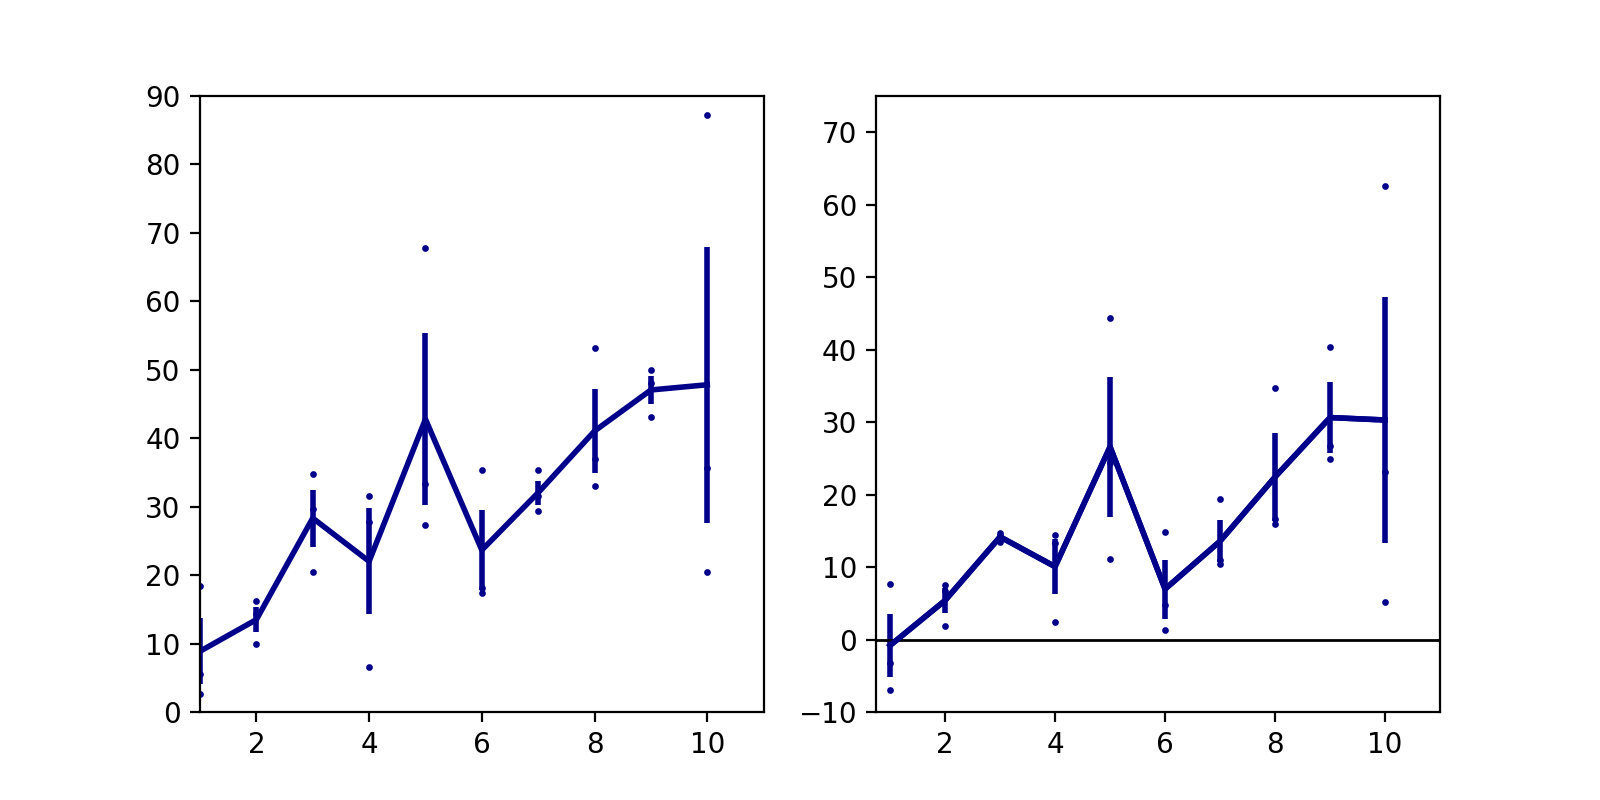

In [39]:
# % of rewarded trials

plt.figure(figsize=(8,4))
ratios_perf=[]
abscisse=[]

plt.subplot(1,2,1)
for mouse in range(len(Mice)):
    ratios_perf.append([])
    abscisse.append(range(max(nSessions)-nSessions[mouse]+1,max(nSessions)+1,1))
        
        
    for session in range(nSessions[mouse]):    
        ratios_perf[mouse].append((len(First_Rewards[mouse][session])-len(First_FreeWater[mouse][session]))/(len(First_Licks[mouse][session])-len(First_FreeWater[mouse][session])))
    plt.scatter(abscisse[mouse],rewTrialperf[mouse],color='darkblue', s=2)
    #plt.plot(ratios_chance[mouse],color='black',ls='--')
plt.axis((1,11,0,90))
    
    
    
#Average performance evolution
av=[]
#avc=[]
for session in range(max(nSessions)):
    av.append([])
    #avc.append([])

        
for session in range(-max(nSessions),0,1): 

    for mouse in range(len(Mice)):

        if abs(session)<=nSessions[mouse]:
            av[session].append(rewTrialperf[mouse][session])
            #avc[session].append((ratios_chance[mouse][session])*100)

mean=[] 
sem=[]


for session in range(max(nSessions)):
    mean.append(np.mean(av[session]))
    sem.append(stats.sem(av[session]))
   
plt.errorbar(range(1,11,1),mean,yerr=sem,color='darkblue',lw=2)

#plt.plot(range(1,11,1),mean,color='darkblue',lw=2)



plt.subplot(1,2,2)
Gain_perf=[]

for mouse in range (len(Mice)):
    Gain_perf.append([])
    
    for session in range(nSessions[mouse]):    
        Gain_perf[mouse].append(rewTrialperf[mouse][session]-ratios_chance[mouse][session]*100)
    plt.scatter(abscisse[mouse],Gain_perf[mouse],color='darkblue', s=2)
    plt.axis((0.75,11,-10,75))

            
#Average performance evolution
avg=[]
for session in range(max(nSessions)):
    avg.append([])
    
for session in range(-max(nSessions),0,1): 
    for mouse in range(len(Mice)):

        if abs(session)<=nSessions[mouse]:
            avg[session].append((Gain_perf[mouse][session]))       
meannorm=[] 
semnorm=[]


for session in range(max(nSessions)):
    meannorm.append(np.mean(avg[session]))
    semnorm.append(stats.sem(avg[session]))
   
plt.errorbar(range(1,11,1),meannorm,yerr=semnorm,color='darkblue',lw=2)

plt.plot(range(1,11,1),meannorm,color='darkblue',lw=2)


    

plt.axhline(0,color='black',lw=1)

plt.show()

In [38]:
print(Gain_perf)


L=[]
for mouse in range (len(Mice)):
    L.append(Gain_perf[mouse][5])
M=[]
for mouse in range (len(Mice)):
    M.append(Gain_perf[mouse][8])   

A=stats.mannwhitneyu(L, M, alternative='two-sided')
print(A)
 

[[-6.9108999108999125, 1.9119644959695687, 14.73714202220923, 14.409829721362225, 44.36488630354309, 14.863142369197334, 10.42676962676963, 16.664309764309763, 26.641509433962263, 62.52748414376321], [7.662229102167183, 7.521604743581657, 13.404148334380892, 13.295073347704921, 11.101298701298699, 4.761528326745722, 19.341176470588238, 15.959387691346453, 24.85278949835912, 5.187820512820512], [-3.1918043132910867, 6.759311408573002, 14.37067271456829, 2.462086023799227, 24.30961829530408, 1.2544892527383311, 10.938412469400706, 34.67314863085911, 40.39545991148118, 23.15739047063185]]
MannwhitneyuResult(statistic=0.0, pvalue=0.08085559837005224)


In [33]:
L=[700,1000,500]
M=[-700,-500,-1000]

A=stats.wilcoxon(L,M)

print(A)

WilcoxonResult(statistic=0.0, pvalue=0.25)


In [40]:
plt.savefig("/Users/hlassagne/Desktop/EasyHardperf.pdf",orientation="portrait", dpi='figure')

<IPython.core.display.Javascript object>


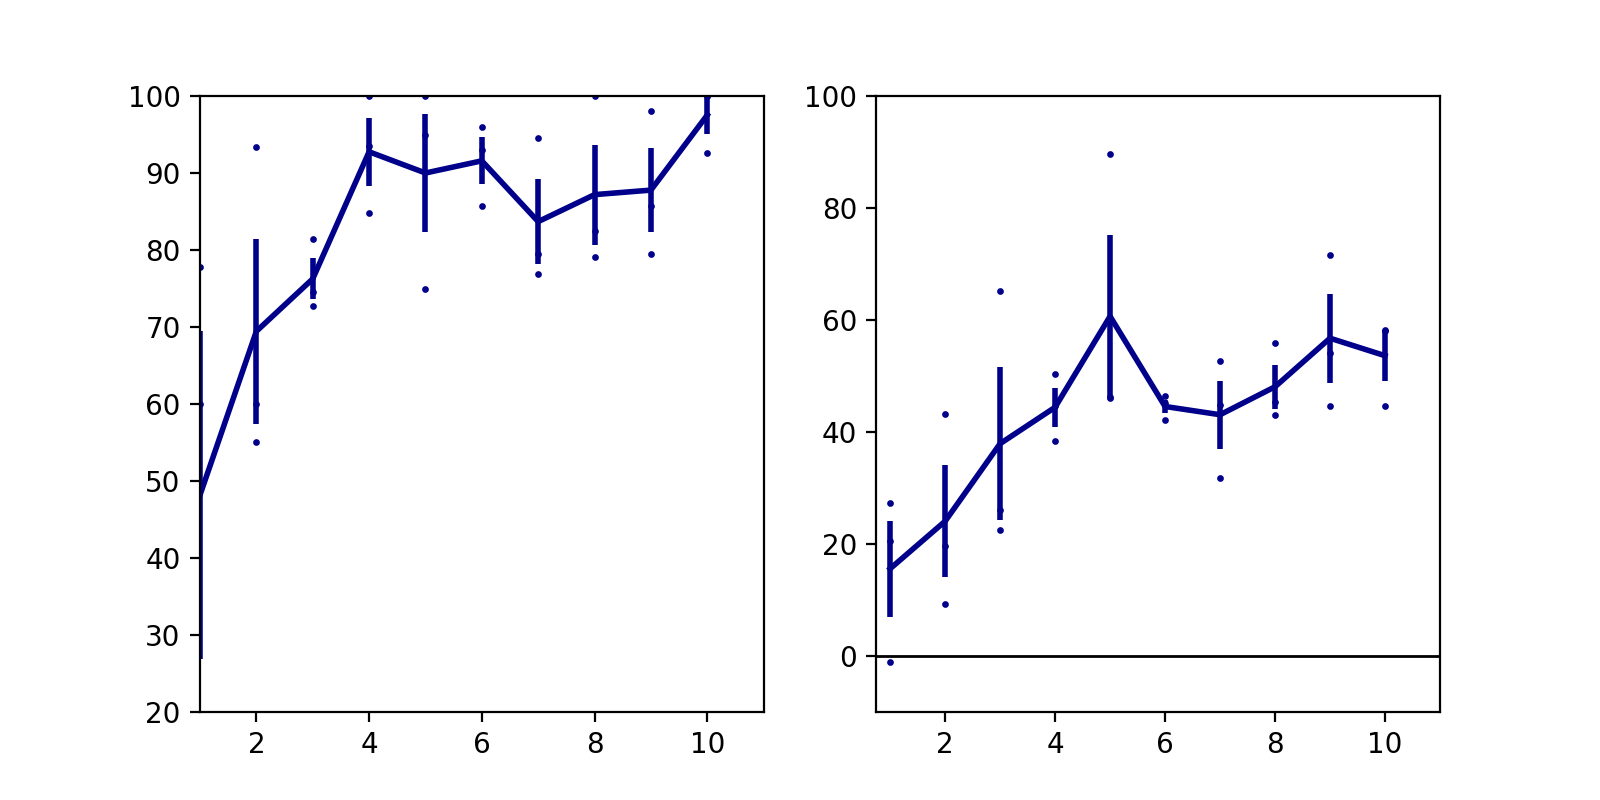

In [44]:
plt.figure(figsize=(8,4))


ratios_dect=[]

plt.subplot(1,2,1)

for mouse in range(len(Mice)):
    ratios_dect.append([])

    for session in range(nSessions[mouse]):
        ratios_dect[mouse].append((len(First_Rewards[mouse][session])-len(First_FreeWater[mouse][session]))/(len(EnteringEvent[mouse][session]))*100)
    plt.scatter(abscisse[mouse],ratios_dect[mouse],color="darkblue", s=2)
    
#Average performance evolution
avd=[]
#avdc=[]
for session in range(max(nSessions)):
    avd.append([])
    #avdc.append([])

        
for session in range(-max(nSessions),0,1):  
    nmouse=0
    
    for mouse in range(len(Mice)):

        if abs(session)<=nSessions[mouse]:
            avd[session].append(ratios_dect[mouse][session])
            #avdc[session].append((ratios_dect_chance[mouse][session]))

    
mean=[] 
sem=[]

plt.axis((1,11,20,100))


for session in range(max(nSessions)):
    mean.append(np.mean(avd[session]))
    sem.append(stats.sem(avd[session]))
   
plt.errorbar(range(1,11,1),mean,yerr=sem,color='darkblue',lw=2)
#plt.plot(range(1,11,1),mean,color='darkblue',lw=2)

                                    


plt.subplot(1,2,2)
Gain_dperf=[]

for mouse in range (len(Mice)):
    Gain_dperf.append([])

    for session in range(nSessions[mouse]):    
        Gain_dperf[mouse].append((ratios_dect[mouse][session]-ratios_dect_chance[mouse][session]*100))
    plt.scatter(abscisse[mouse],Gain_dperf[mouse],color='darkblue', s=2)
plt.axis((0.75,11,-10,100))

            
#Average performance evolution
avdg=[]
for session in range(max(nSessions)):
    avdg.append([])
    
for session in range(-max(nSessions),0,1): 
    for mouse in range(len(Mice)):

        if abs(session)<=nSessions[mouse]:
            avdg[session].append(Gain_dperf[mouse][session])
meannorm=[] 
semnorm=[]



for session in range(max(nSessions)):
    meannorm.append(np.mean(avdg[session]))
    semnorm.append(stats.sem(avdg[session]))
   
#plt.plot(range(1,11,1),meannorm,color='darkblue',lw=2)
plt.errorbar(range(1,11,1),meannorm,yerr=semnorm,color='darkblue',lw=2)
        

plt.axhline(0,color='black',lw=1)
plt.show()

In [58]:
print(rewTrialperf[0][-1])
print(ratios_dect[0][-1])

print(rewTrialperf[1][-2])
print(ratios_dect[1][-2])

print(rewTrialperf[2][-2])
print(ratios_dect[2][-2])

87.20930232558139
92.5925925925926
43.037974683544306
79.54545454545455
50.0
85.71428571428571


In [45]:
plt.savefig("/Users/hlassagne/Desktop/EasyHardDect.pdf",orientation="portrait", dpi='figure')

<IPython.core.display.Javascript object>


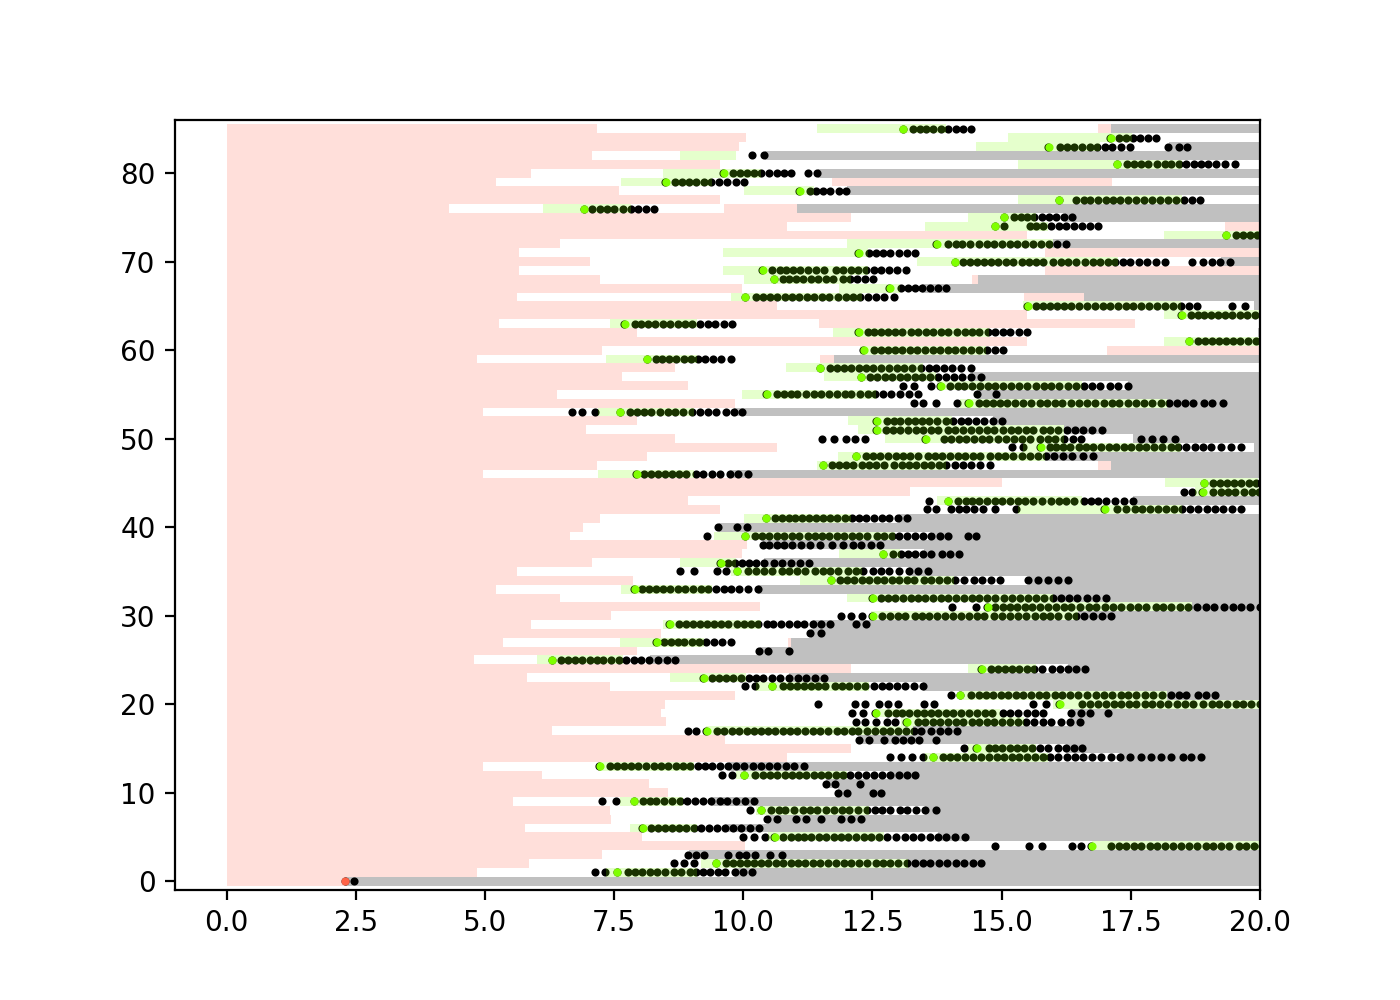

In [17]:
#First/Last

plt.figure(figsize=(7,5))

   


# Only trials which entered the reward

t=1
for mouse in range (0,1,1):
    for session in [9]:
        #plt.subplot(2,1,t)
        #t+=1
        
        skip=0
        scale=0
        for trial in range(len(Lick_punished_trial[mouse][session])):
            if Trial_length[mouse][session][trial]<0.1:
                skip+=1
            else:  
                scale+=1
                
                plt.fill_betweenx([trial-0.5-skip,trial+0.5-skip],Trial_length[mouse][session][trial],20,facecolor='silver',edgecolor='none',alpha=1)
                
                plt.scatter(Lick_trial[mouse][session][trial],np.ones(len(Lick_trial[mouse][session][trial]))*(trial-skip),color='black', s=3*90**2/((len(EnteringEvent[mouse][session]))**2))
                plt.scatter(Reward_trial[mouse][session][trial],np.ones(len(Reward_trial[mouse][session][trial]))*(trial-skip),color='chartreuse', s=3*90**2/((len(EnteringEvent[mouse][session]))**2))
                plt.scatter(Lick_punished_trial[mouse][session][trial],np.ones(len(Lick_punished_trial[mouse][session][trial]))*(trial-skip),color='tomato', s=3*90**2/((len(EnteringEvent[mouse][session]))**2))


                
                if len(LeavingPunishment[mouse][session][trial])>0:
                    plt.fill_betweenx([trial-0.5-skip,trial+0.5-skip],0,LeavingPunishment[mouse][session][trial][0],facecolor='tomato',edgecolor='none',alpha=0.2)
                else:
                    plt.fill_betweenx([trial-0.5-skip,trial+0.5-skip],0,Trial_length[mouse][session][trial],facecolor='tomato',edgecolor='none',alpha=0.2)
                    
                    
                if LeavingReward[mouse][session][trial]!=[]:
                    for k in range(len(LeavingReward[mouse][session][trial])):
                        plt.fill_betweenx([trial-0.5-skip,trial+0.5-skip],EnteringReward[mouse][session][trial][k],LeavingReward[mouse][session][trial][k],facecolor='chartreuse',edgecolor='none',alpha=0.2)
                else:
                    if EnteringReward[mouse][session][trial]!=[]: 
                        plt.fill_betweenx([trial-0.5-skip,trial+0.5-skip],EnteringReward[mouse][session][trial][0],Trial_length[mouse][session][trial],facecolor='chartreuse',edgecolor='none',alpha=0.2)
                
                
                if EnteringPunishment[mouse][session][trial]!=[]:
                    for k in range(len(EnteringPunishment[mouse][session][trial])):
                        if len(LeavingPunishment[mouse][session][trial])>k+1:
                            plt.fill_betweenx([trial-0.5-skip,trial+0.5-skip],EnteringPunishment[mouse][session][trial][k],LeavingPunishment[mouse][session][trial][k+1],facecolor='tomato',edgecolor='none',alpha=0.2)
                        else:
                            plt.fill_betweenx([trial-0.5-skip,trial+0.5-skip],EnteringPunishment[mouse][session][trial][k],Trial_length[mouse][session][trial],facecolor='tomato',edgecolor='none',alpha=0.2)
                plt.axis((-1,20,-1,scale))



                

plt.show()

In [85]:
plt.savefig("/Users/hlassagne/Desktop/Hardpie.pdf",orientation="portrait", dpi='figure')

In [62]:
Frame_at_First_Licks_Left=[]
Frame_at_First_Licks_Right=[]
Frame_at_First_Licks_Bil=[]


#Classify Left_right Frame at first Licks
for mouse in range (len(Mice)):
    print(mouse)
    Frame_at_First_Licks_Left.append([])
    Frame_at_First_Licks_Right.append([])
    Frame_at_First_Licks_Bil.append([])
    
    for session in range(nSessions[mouse]):
        Frame_at_First_Licks_Left[mouse].append([])
        Frame_at_First_Licks_Right[mouse].append([])
        Frame_at_First_Licks_Bil[mouse].append([])
        
        for trial in range(len(TrialStart[mouse][session])-1):
            
            
            
            
            #if EnteringReward[mouse][session][trial]!=[] and Reward_trial[mouse][session][trial]!=[]:
            ind_debut=0
            ind_fin=0
            while Frames[mouse][session][:][:,1][ind_debut]<TrialStart[mouse][session][trial]:
                ind_debut+=1
            while Frames[mouse][session][:][:,1][ind_fin]<TrialStart[mouse][session][trial+1]:
                ind_fin+=1
            line=list(Frames[mouse][session][:][:,0][ind_debut:ind_fin])
            
            
            
            rotation=0
            
            for k in line:
                if 90<k<90+10:
                    rotation="r"
                    break
                if 270-10<k<270:
                    rotation="l"
                    break 
           
                    
                    
            for f_lick_ind in range(len(First_Licks_NoInter[mouse][session])):
                if Frames[mouse][session][:][:,1][ind_debut]<First_Licks_NoInter[mouse][session][f_lick_ind]<Frames[mouse][session][:][:,1][ind_fin]:
                    if rotation=="l":
                        Frame_at_First_Licks_Left[mouse][session].append(Frame_at_First_Licks_NoInter[mouse][session][f_lick_ind])
                        Frame_at_First_Licks_Bil[mouse][session].append(Frame_at_First_Licks_NoInter[mouse][session][f_lick_ind])
                        break
                    if rotation=="r":
                        Frame_at_First_Licks_Right[mouse][session].append(Frame_at_First_Licks_NoInter[mouse][session][f_lick_ind])
                        Frame_at_First_Licks_Bil[mouse][session].append(360-Frame_at_First_Licks_NoInter[mouse][session][f_lick_ind])
                        break

                            
                            

0
1
2


In [63]:
Frame_at_First_Licks_Bil_Short=[]
for mouse in range (len(Mice)):
    Frame_at_First_Licks_Bil_Short.append([])
    for session in range(nSessions[mouse]):
        Frame_at_First_Licks_Bil_Short[mouse].append([])
        for k in range(min(20,len(Frame_at_First_Licks_Bil[mouse][session]))):
            if 270-1<Frame_at_First_Licks_Bil[mouse][session][k]<=270:
                Frame_at_First_Licks_Bil_Short[mouse][session].append(269)

            else:
                
                Frame_at_First_Licks_Bil_Short[mouse][session].append(Frame_at_First_Licks_Bil[mouse][session][k])




<IPython.core.display.Javascript object>


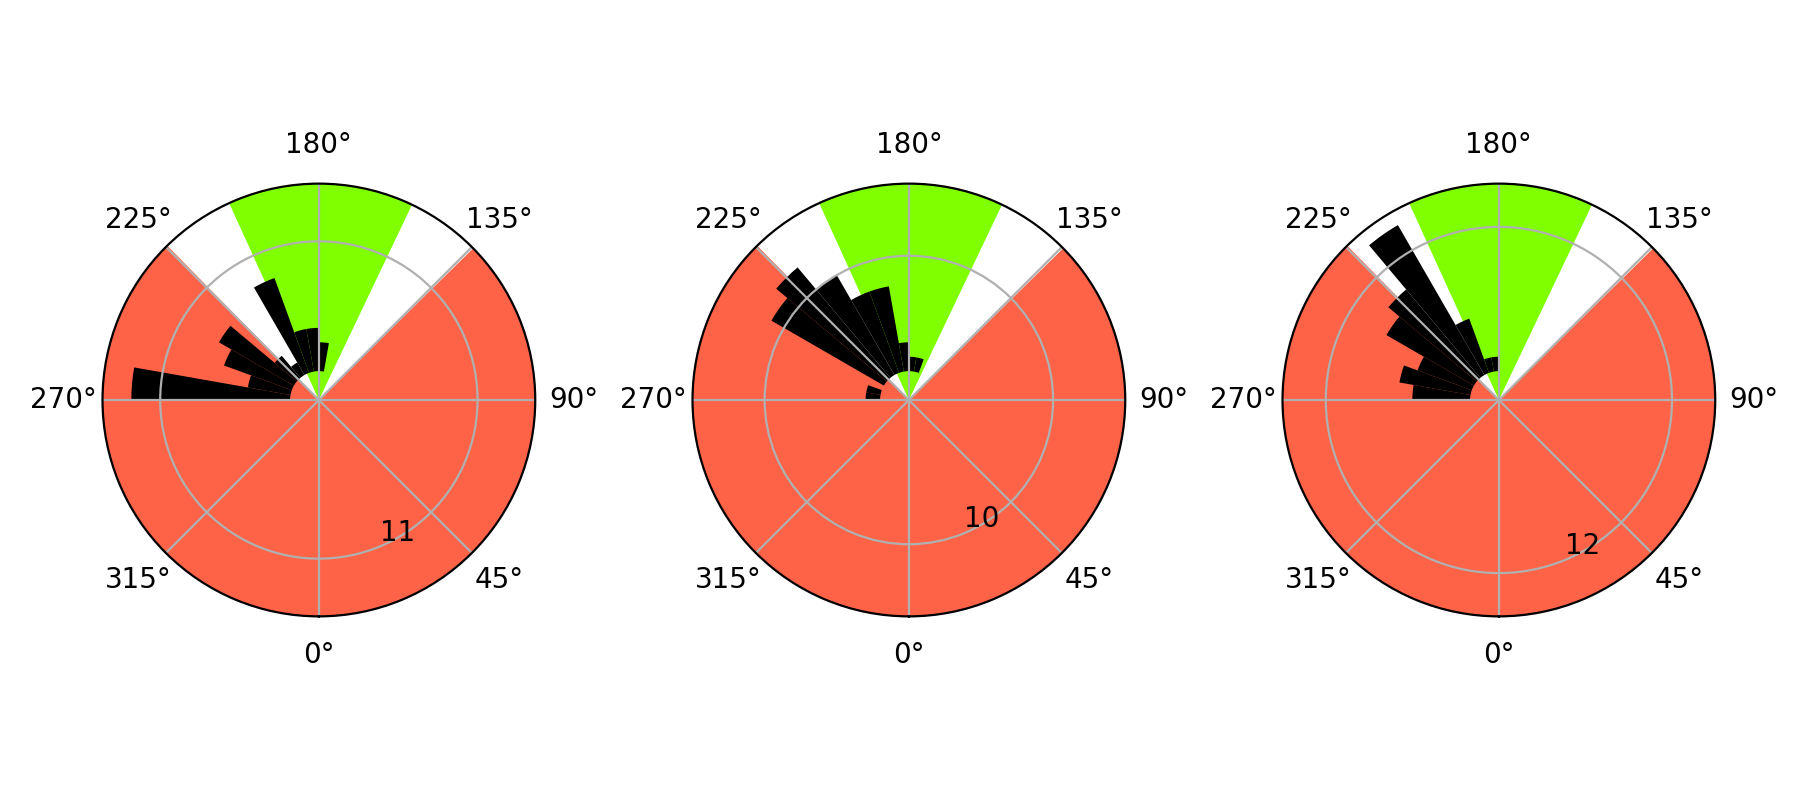

43
45
46


In [84]:
#histogram
degrees=range(5,365,10)
radians = np.deg2rad(degrees)
reward_degrees=range(155,205,1)
reward_radians = np.deg2rad(reward_degrees)
punish_degrees=range(270,450,1)
punish_radians = np.deg2rad(punish_degrees)



fig, axes = plt.subplots(nrows=1,ncols= 3 ,figsize=(9,4),subplot_kw=dict(polar=True))
fig.tight_layout() 


s=0

session_ev=[]
for mouse in range(len(Mice)):
    #Early session
    session_ev.append([4])
    
    #Mid session

    #Last
   # session_ev[mouse].append(7)
    #session_ev[mouse].append(8)
    if mouse==1 or mouse==2:
        session_ev[mouse].append(8)
    else:
        session_ev[mouse].append(9)
        
    session_ev[mouse].append(9)
    





for index in range(3):
    b=[]
    for i in range(36):
        b.append(0)
    
    for mouse in range(3):
 
        for i in range (len(Frames[mouse][session_ev[mouse][index]])):
            frame_nb=int(Frames[mouse][session_ev[mouse][index]][i][0]/10.01)

        bmouse=np.histogram(Frame_at_First_Licks_Bil_Short[mouse][session_ev[mouse][index]],bins=36,range=(0,360))

        for i in range(36):
            b[i]+=bmouse[0][i]
    print(sum(b))
            
        
        

    if s==0:
        punish_degrees=range(225,495,1)
        punish_radians = np.deg2rad(punish_degrees)


        
    axes[s].bar((reward_radians[0]+reward_radians[-1])/2,10*1.5,width=2*np.pi/360.*len(reward_radians),color='chartreuse')   
    axes[s].bar((punish_radians[0]+punish_radians[-1])/2,10*1.5,width=2*np.pi/360.*len(punish_radians),color='tomato')



    axes[s].bar(radians,b,width=2*10*np.pi/360.,bottom=10*0.2,color='black')
    axes[s].set_theta_zero_location("S")


    axes[s].set_rticks([max(b)])  # less radial ticks

    #axes[s].set_xticks(np.pi/180. * np.linspace(30,  390 , 6 , endpoint=False))
    axes[s].set_thetalim(0, 2*np.pi)
        # less radial ticks
        #axes[s].yaxis.set_major_formatter(plt.NullFormatter())
    axes[s].set_rmax(10*1.5)
        #axes[s].xaxis.set_major_formatter(plt.NullFormatter())
    s+=1
        
plt.show()

In [75]:
#Determination des pourcentges last session
pourc_rew_last=[]
pourc_pun_last=[]
pourc_buf_last=[]
pourc_or_last=[]
session=9

for mouse in range(len(Mice)):
    if Mice[mouse] == 129 or Mice[mouse] == 120 :
        session=8
    else:
        session=9
    nb_rew=0
    nb_pun=0
    nb_buf=0
    nb_or=0
    
    for frame in Frame_at_First_Licks_NoInter[mouse][session]:
        if RewardLow[mouse]<frame<RewardUp[mouse]:
            nb_rew+=1
        elif 0<=frame<=90:
            nb_pun+=1
            
        elif 90<frame<=135:
            nb_or+=1
            
        elif 225<=frame<270:
            nb_or+=1
            
        elif 270<=frame<=360:  
            nb_pun+=1
            
        else:
            nb_buf+=1
            
    pourc_rew_last.append(nb_rew/len(Frame_at_First_Licks_NoInter[mouse][session]))
    pourc_pun_last.append(nb_pun/len(Frame_at_First_Licks_NoInter[mouse][session]))
    pourc_buf_last.append(nb_buf/len(Frame_at_First_Licks_NoInter[mouse][session]))
    pourc_or_last.append(nb_or/len(Frame_at_First_Licks_NoInter[mouse][session]))



print(np.mean(pourc_rew_last))
print(np.mean(pourc_buf_last))
print(np.mean(pourc_or_last))
print(np.mean(pourc_pun_last))


0.5910852713178295
0.18682170542635657
0.15988372093023256
0.06220930232558139


In [77]:
#Determination des pourcentges last session
pourc_rew_first=[]
pourc_pun_first=[]
pourc_buf_first=[]
pourc_or_first=[]
session=5

for mouse in range(len(Mice)): 
    nb_rew=0
    nb_pun=0
    nb_buf=0
    nb_or=0
    
    for frame in Frame_at_First_Licks_NoInter[mouse][session]:
        if RewardLow[mouse]<frame<RewardUp[mouse]:
            nb_rew+=1
        elif 0<=frame<=90:
            nb_pun+=1
            
        elif 90<frame<=135:
            nb_or+=1
            
        elif 225<=frame<270:
            nb_or+=1
            
        elif 270<=frame<=360:  
            nb_pun+=1
            
        else:
            nb_buf+=1
            
    pourc_rew_first.append(nb_rew/len(Frame_at_First_Licks_NoInter[mouse][session]))
    pourc_pun_first.append(nb_pun/len(Frame_at_First_Licks_NoInter[mouse][session]))
    pourc_buf_first.append(nb_buf/len(Frame_at_First_Licks_NoInter[mouse][session]))
    pourc_or_first.append(nb_or/len(Frame_at_First_Licks_NoInter[mouse][session]))



print(np.mean(pourc_rew_first))
print(np.mean(pourc_buf_first))
print(np.mean(pourc_or_first))
print(np.mean(pourc_pun_first))


0.11203715826820833
0.12767359449150997
0.479329210837542
0.28096003640273964


In [1]:
A=stats.mannwhitneyu(pourc_rew_first, pourc_rew_last)


print(A)

#A=stats.mannwhitneyu(pourc_buf_first, pourc_buf_last)

#print(A)

A=stats.mannwhitneyu(pourc_pun_first, pourc_pun_last)


print(A)

A=stats.mannwhitneyu(pourc_or_first, pourc_or_last)


print(A)


NameError: name 'stats' is not defined

<IPython.core.display.Javascript object>


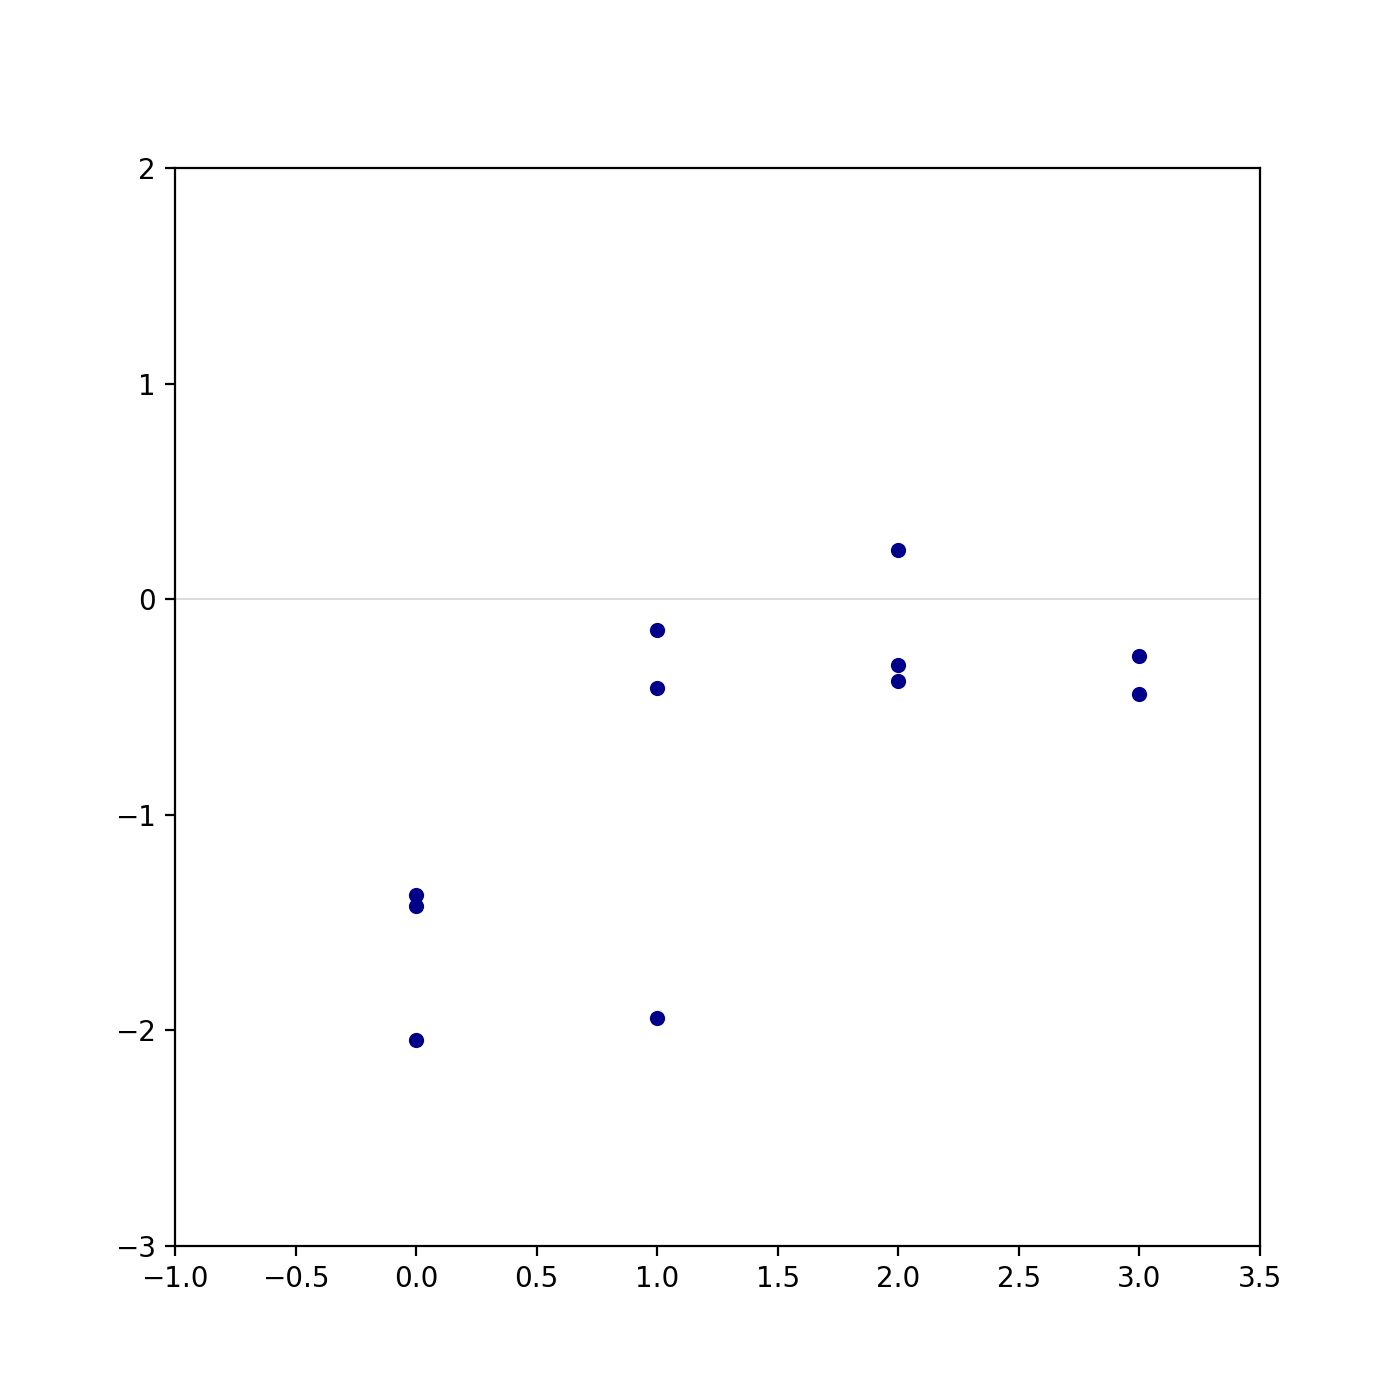

In [24]:
# Anticipation value at session >90% dect

plt.figure(figsize=(7,7))
T=[]
Reaction_time=[]
s=0

for mouse in range (len(Mice)):
    T.append([])
    Reaction_time.append([])
    s=0
    for session in range(nSessions[mouse]): 
        if ratios_dect[mouse][session]>90:
            T[mouse].append([])
            for trial in range(len(TrialStart[mouse][session])-1):
                if EnteringReward[mouse][session][trial]!=[] and Lick_trial[mouse][session][trial]!=[]:
                    T[mouse][s].append(Lick_trial[mouse][session][trial][0]-EnteringReward[mouse][session][trial][0])
            
                
            if (len(T[mouse][s])>4):
                
                Reaction_time[mouse].append(np.median(T[mouse][s]))
                
            s+=1
     

  
for mouse in range (len(Mice)):

    if mouse<8:
        plt.scatter(range(len(Reaction_time[mouse])),Reaction_time[mouse], color="darkblue",s=20)
    else:
        plt.scatter(range(len(Reaction_time[mouse])),Reaction_time[mouse], color="violet",s=20)


plt.axhline(0,color="black",lw=0.1)
    
# Average
#av=[[],[],[],[],[]]
#mean=[]
#sem=[]
#nsession=[0,0,0,0,0]
#for mouse in range(len(Mice)):
#    for session in range (len(Reaction_time[mouse])):
#        av[session].append(Reaction_time[mouse][session])
        
#for session in range(5):
#    mean.append(np.mean(av[session]))
#    sem.append(stats.sem(av[session]))
    
#plt.errorbar(range(0,5,1),mean,yerr=sem,color='purple',lw=2)
 
plt.axis((-1,3.5,-3,2))    
plt.show()

<IPython.core.display.Javascript object>


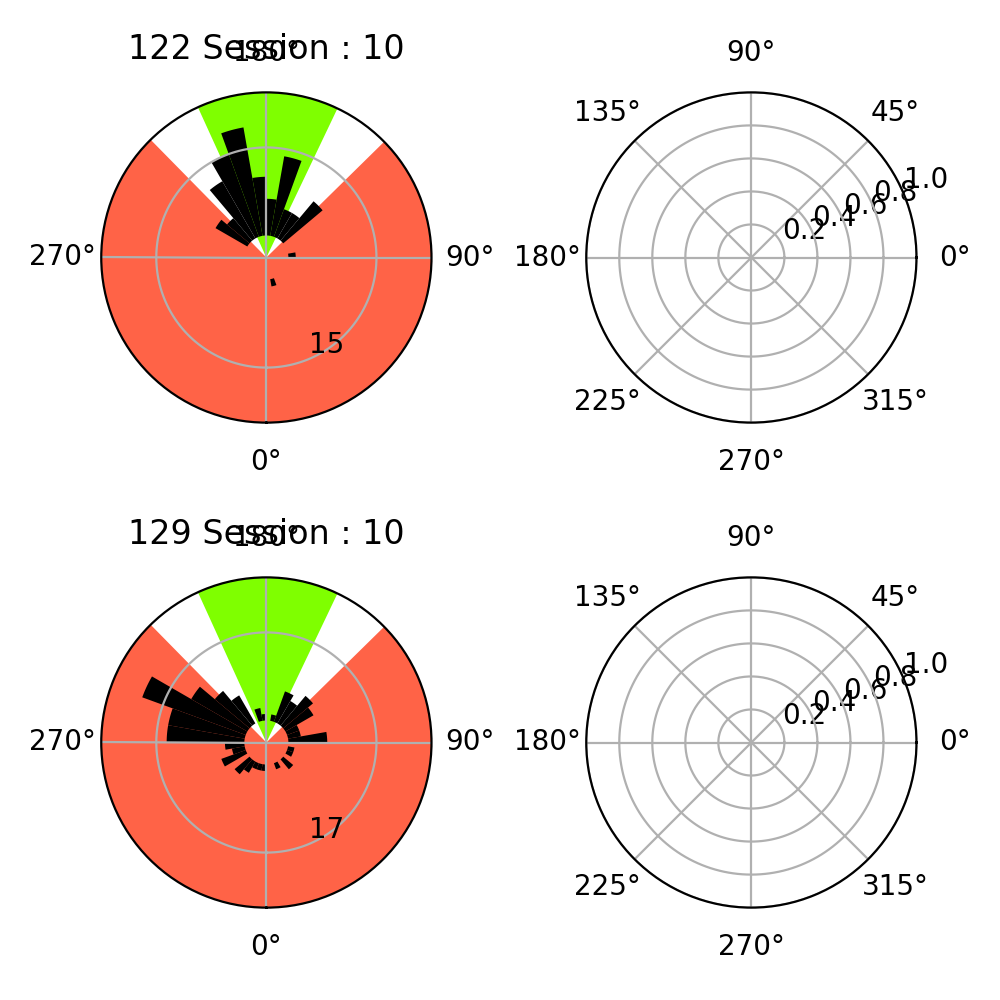

In [63]:
#histogram
degrees=range(5,365,10)
Weights=[]
radians = np.deg2rad(degrees)
reward_degrees=range(RewardLow[0],RewardUp[0],1)
reward_radians = np.deg2rad(reward_degrees)

fig, axes = plt.subplots(nrows=2,ncols= 2 ,figsize=(5,5),subplot_kw=dict(polar=True))
fig.tight_layout() 

for mouse in range (len(Mice)):
    Weights.append([])
    for session in range(nSessions[mouse]):
        Weights[mouse].append([])
s=0
for mouse in range (2):
    for session in [9]:
        
        if 0<=session<10:
            punish_degrees=range(270,450,1)
            punish_radians = np.deg2rad(punish_degrees)
        if 5<=session<15:
            punish_degrees=range(225,495,1)
            punish_radians = np.deg2rad(punish_degrees)
        axes[s][0].set_title(str(Mice[mouse])+" Session : "+str(session+1))
        b=np.histogram(Frame_at_First_Licks[mouse][session],bins=36,range=(0,360))
        
        
        for l in range(0,36,1):
            Weights[mouse][session].append(0)  
        for i in range (len(Frames[mouse][session])):
            frame_nb=int(Frames[mouse][session][i][0]/10.001)
            Weights[mouse][session][frame_nb]+=1 

        #for j in range (len(b[0])):
            #if(Weights[mouse][session][j]!=0):
                #b[0][j] = 100000*float(b[0][j])/Weights[mouse][session][j]
        
        axes[s][0].bar((reward_radians[0]+reward_radians[-1])/2,1.5*max(b[0]),width=2*np.pi/360.*len(reward_radians),color='chartreuse')   
        axes[s][0].bar((punish_radians[0]+punish_radians[-1])/2,1.5*max(b[0]),width=2*np.pi/360.*len(punish_radians),color='tomato')

    
        axes[s][0].bar(radians,b[0],width=2*10*np.pi/360.,bottom=0.2*max(b[0]),color='black')
        axes[s][0].set_theta_zero_location("S")
        axes[s][0].set_rticks([max(b[0])])  # less radial ticks

        axes[s][0].set_xticks(np.pi/180. * np.linspace(0,  360 , 4 , endpoint=False))
        axes[s][0].set_thetalim(0, 2*np.pi)
        # less radial ticks
        #axes[s][0].yaxis.set_major_formatter(plt.NullFormatter())
        axes[s][0].set_rmax(1.5*max(b[0]))
        #axes[s][0].xaxis.set_major_formatter(plt.NullFormatter())
        
        
       
        s+=1
        
plt.show()

In [47]:
plt.savefig("/Users/hlassagne/Desktop/Hardpie.pdf",orientation="portrait", dpi='figure')

In [ ]:
for mouse in range (len(Mice)):
    for session in [nSessions[mouse]-1]:
        print(mouse)
        print(rewTrialperf[mouse][session])
        print(ratios_dect[mouse][session])

In [ ]:
#Chance levels for each session
#Create fake sessions (Careful this code is awesome)



import random
F=open("/Users/hlassagne/Documents/Owncloud/BMI/Setup/Trajectories_OpenLoop_Henri/PlaybackSlow.txt",'r')

data=F.readlines()
F.close()
FramesEx=[]
RewardEx=[]
ratios_chance=[]
ratios_dect_chance=[]
ratios_rewTrialperf_chance=[]

#Reset_Function
def reset_trial():
    global Frames_Trial
    global find
    global boolEnter
    global ntrialf
    global boolrew
    index_trial=int(rand()*len(data))
    line=data[index_trial].split(',')
    Frames_Trial=[]
    boolEnter=0
    for ind in range(len(line)-1):
        Frames_Trial.append(int(line[ind]))
    find=0
    ntrialf+=1
    boolrew=0
    

           
    
for mouse in range (2):
    ratios_chance.append([])
    ratios_dect_chance.append([])
    ratios_rewTrialperf_chance.append([])
        
    for session in range(5,10,1):
        ntrialf=0
        nrewf=0
        print("mouse: "+str(Mice[mouse])+" ,session: "+str(session))
        ratio=[]
        ratio_d=[]
        ratio_t=[]
        
        boolEnter=0
        
        for instance in range(100):
            nEnter=0
        
            low=90
            up=270
            
            if session>4:
                low=135
                up=225
                
                
            Frames_Fake=[]
            Reward_Fake=[]

            Frames_Trial=[]
            find=0

            #Init the time clock
            time=0.0
            Lick_index=0
            reset_trial()

            while time<30000*60*30: #Session last 30 minute
                if Lick_index<len(Licks[mouse][session]):
                    CurrentLickTime=Licks[mouse][session][Lick_index]
                
                if find<len(Frames_Trial):
                    Frames_Fake.append(Frames_Trial[find])
                    find+=1
                    
                else:
                    reset_trial()      
                    for pause in range (500):
                        Frames_Fake.append(0)
                        time+=30000*0.01
                        if CurrentLickTime<time:
                            Lick_index+=1
                            if Lick_index<len(Licks[mouse][session]):
                                CurrentLickTime=Licks[mouse][session][Lick_index]
                                
                
                if RewardLow[mouse]<=Frames_Fake[-1]<=RewardUp[mouse]:
                    if boolEnter==0:
                        nEnter+=1
                        boolEnter=1
                        
                            
                time+=30000*0.01
    
                if CurrentLickTime<time:
                    Lick_index+=1
                    if low<Frames_Fake[-1]<up:
                        if RewardLow[mouse]<Frames_Fake[-1]<RewardUp[mouse]:
                            if Lick_index<len(Licks[mouse][session]):
                                Reward_Fake.append(Licks[mouse][session][Lick_index-1])
                                if boolrew==0:
                                    nrewf+=1
                                    boolrew=1
                    else: 
                        reset_trial()
                        for pause in range (500):
                            Frames_Fake.append(0)
                            time+=30000*0.01
                            if CurrentLickTime<time:
                                Lick_index+=1
                                if Lick_index<len(Licks[mouse][session]):
                                    CurrentLickTime=Licks[mouse][session][Lick_index]

                    
        #Remove bursts of licks/Bursts of rewards
            First_Licksf=[Licks[mouse][session][0]]
        
            First_Rewardsf=[]
            if Reward_Fake!=[]:
                First_Rewardsf.append(Reward_Fake[0])
            
            for j in range (len(Licks[mouse][session])-1):
                if Licks[mouse][session][j+1]-Licks[mouse][session][j]>3000*30:
                    First_Licksf.append(Licks[mouse][session][j+1])
    

            for j in range (len(Reward_Fake)-1):
                if Reward_Fake[j+1]-Reward_Fake[j]>3000*30:
                    First_Rewardsf.append(Reward_Fake[j+1])
        
            ratio.append(len(First_Rewardsf)/len(First_Licksf)) 
            
            if (len(First_Rewardsf))>len(First_FreeWater[mouse][session]):
                ratio_d.append((len(First_Rewardsf)/(nEnter)))
            else:
                ratio_d.append(0)
                
            ratio_t.append(float(nrewf)/ntrialf)
                
        ratios_chance[mouse].append(np.mean(ratio))
        
        ratios_dect_chance[mouse].append(np.mean(ratio_d))
        ratios_rewTrialperf_chance[mouse].append(np.mean(ratio_t))
        

In [ ]:
for mouse in range(2):
    s=0
    for session in (sessions[mouse][5:10]):  
        F=open("/Volumes/HENRI DD/Data/mouse"+str(Mice[mouse])+"/Playback/session"+str(session+1)+"/chancevalue.txt",'w')
        F.write(str(ratios_chance[mouse][s])+','+str(ratios_dect_chance[mouse][s]))
        
        s+=1
        F.close()

In [ ]:
 #Anticipation value at session >90% dect

plt.figure(figsize=(7,7))
T=[]
Reaction_time=[]
L=[]

s=0

for mouse in range (len(Mice)):
    T.append([])
    Reaction_time.append([])

    
    s=0
    for session in range(nSessions[mouse]): 
        #Reaction_time[mouse].append([])
        if ratios_dect[mouse][session]>90:
            print(session)
            T[mouse].append([])
            for trial in range(min(30,len(TrialStart[mouse][session])-1)):
                if EnteringReward[mouse][session][trial]!=[] and Lick_trial[mouse][session][trial]!=[]:
                    T[mouse][s].append(Lick_trial[mouse][session][trial][0]-EnteringReward[mouse][session][trial][0])
            
                
        
            Reaction_time[mouse].append((T[mouse][s]))
            
        
            
            
            s+=1
     

  
#for mouse in range (len(Mice)):

    #for session in range(len(Reaction_time[mouse])): 

        #plt.scatter([session]*len(Reaction_time[mouse][session]),Reaction_time[mouse][session], color="darkblue",s=20)
        
for session in range(7):
    L.append([])
    
        
for mouse in range(3):
    for session in range(len(Reaction_time[mouse])):
        for item in Reaction_time[mouse][session]:
            L[session].append(item)
    
plt.axhline(0,color="black",lw=0.1)
    
# Average
#av=[[],[],[],[],[]]
#mean=[]
#sem=[]
#nsession=[0,0,0,0,0]
#for mouse in range(len(Mice)):
#    for session in range (len(Reaction_time[mouse])):
#        av[session].append(Reaction_time[mouse][session])

mean=[]
sem=[]


#print(len(L))


for s in range(7):
    mean.append(np.median(L[s]))
    sem.append(stats.iqr(L[s])/2.)
    
plt.errorbar(range(0,7,1),mean,yerr=sem,color='purple',lw=2)
 
plt.axis((-1,10,-5,5))    
plt.show()

In [120]:
plt.savefig("/Users/hlassagne/Desktop/Delayhard.pdf",orientation="portrait", dpi='figure')